In [247]:
import pandas as pd

In [248]:
dataset=pd.read_csv('insurance_pre.csv')

In [249]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [250]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [251]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dependent=dataset[['charges']]

In [252]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [253]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse', splitter='random',max_features='log2')
regressor=regressor.fit(X_train,y_train)

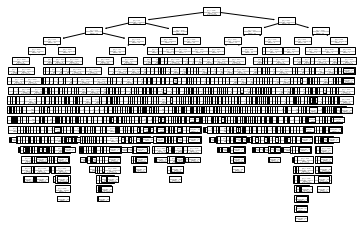

In [254]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [255]:
y_pred=regressor.predict(X_test)

In [256]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

In [257]:
r2_score

0.7176389682310165

In [156]:
import pickle
filename="Finalised_model_DT_mae_random_auto.sav"
pickle.dump(regressor,open(filename,'wb'))